In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import json
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn import preprocessing
import string
#from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import langid
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/100w-noword2vec/df_100w_all_noWord2Vec.csv
/kaggle/input/yelp-dataset/Dataset_User_Agreement.pdf
/kaggle/input/yelp-dataset/yelp_academic_dataset_review.json
/kaggle/input/yelp-dataset/yelp_academic_dataset_checkin.json
/kaggle/input/yelp-dataset/yelp_academic_dataset_business.json
/kaggle/input/yelp-dataset/yelp_academic_dataset_tip.json
/kaggle/input/yelp-dataset/yelp_academic_dataset_user.json
/kaggle/input/supplementary-dataset/Review - Polarity - 1.csv
/kaggle/input/supplementary-dataset/Review - Polarity - 6.csv
/kaggle/input/supplementary-dataset/Review - Polarity - 4.csv
/kaggle/input/supplementary-dataset/Review - Polarity - 7.csv
/kaggle/input/supplementary-dataset/Review - Polarity - 3.csv
/kaggle/input/supplementary-dataset/Review - Subjectivity.csv
/kaggle/input/supplementary-dataset/Review - Polarity - 5.csv
/kaggle/input/supplementary-dataset/Review - Polarity - 2.csv
/kaggle/input/supplementary-dataset/Non English Review ID.csv


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [7]:
# If need lastest 100W reviews
#df_review_restaurant_100w = df_review_restaurant.iloc[0:1000000,]

In [12]:
# merge the three datasets
df_all = df_review_restaurant.merge(df_business_restaurant, on = ['business_id'], how = 'left').merge(df_user_restaurant, on = ['user_id'], how = 'left') 

In [13]:
# stratify the data

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

for train_index, sample_index in sss.split(df_all, df_all['stars']):
    sampled = df_all.iloc[sample_index]

In [14]:
df_active = df_all[df_all['user_activity'] == 'Active User']
df_non_active = df_all[df_all['user_activity'] == 'Non-active User']
sample=sampled

In [17]:
sample

,review_id,user_id,business_id,stars,review_useful,review_funny,review_cool,text,date,rev_polarity_x,...,compliment_funny,compliment_writer,compliment_photos,compliment_total,friends_count,elites_count,review_count_y,average_stars,rev_polarity_y,user_activity
1215689,LRiXUbGms7hcYCdszG4fug,UEYiYLxvxq-04fGPBGqNZw,CCeUPUSWxYqUB_qtkGi2Lg,5,1,0,0,I recently had dinner at The Inn At Barley She...,2019-04-12 23:55:39,0.9036,...,1.0,0.0,0.0,3.0,1.0,0.0,5.0,4.2,0.596540,Active User
2622287,B8MNR7aY67YPB1wtwm7C9Q,dbWrWZN_pCzmALaWs4gulA,naR0-fib3LmYnxxVP9nNXQ,5,3,0,0,Best oriental cuisine around. Shared an order ...,2016-11-01 21:28:25,0.9786,...,0.0,0.0,0.0,1.0,207.0,0.0,27.0,4.851852,0.904444,Active User
2936758,DnNjo2Etx2J7gicv0DvFqQ,U1ejR2a9qPfCe579aW8pRw,u7uFQCoHFtBKCtbWUm6yZw,5,0,0,1,We snagged a 5:30 reservation here on Valentin...,2016-03-23 19:26:37,0.9978,...,31.0,11.0,20.0,154.0,202.0,8.0,6.0,4.333333,0.970950,Active User
2602003,6Vk8V3Y-EydI5q42nMKI_w,YsugIp2XB6yyk73ytiZ0UQ,T4E23iml3us2oH_OVGBr4Q,3,2,0,0,This is place was a bit of a disappointment. ...,2016-11-18 22:54:08,-0.8992,...,0.0,1.0,0.0,3.0,2.0,2.0,3.0,4.0,0.308267,Active User
643071,BuIycY09sWwuTMuaZ-U-9w,IANbZ64wi189KnXBVAtjtw,CTQvYTvrpV9yx3vBpsHOUQ,1,0,0,0,This is one of our favorite places to eat. It ...,2020-05-16 06:37:34,0.4740,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,0.701650,Active User
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519670,AnwuhNhFSmPHlRwEb7btxQ,kTpsjDUhl9BlRl0FVuNreA,rgSHLh2Le0Un82FDxbq0mg,5,25,9,21,Easily one of the best new brunch spots in the...,2017-01-22 20:55:19,0.9974,...,509.0,145.0,330.0,4014.0,2617.0,7.0,224.0,3.910714,0.957958,Active User
3236877,QC2bK-b8C7HR9rHtLpe5jw,AW0s7QFgQtoZYIeAz9mpDw,GnW4InGIHjTPhUlon9TwUQ,5,0,0,0,Well hidden and demure looking I found this pl...,2015-08-13 18:04:49,0.8860,...,3.0,0.0,0.0,14.0,32.0,0.0,28.0,3.107143,0.341132,Active User
969888,rxtSi4AUuT5TEMYdjA07lA,DgqPY6O5gD8vdavY33q03w,VeodynTzM0rC2OhkEDoQdg,5,0,0,0,I've eaten here a number of times with many fr...,2019-08-30 06:19:51,0.8268,...,0.0,0.0,0.0,0.0,1.0,0.0,6.0,4.833333,0.775183,Active User
333154,8ZFm216q8PsmhSaJjIiTOA,yOpU4HgMg-pZDP1k2CYbXQ,IqitQsWPnTVTCJIRqh80lA,2,0,0,0,Update. New ownership and the food is definite...,2021-04-02 20:49:34,-0.8090,...,1.0,3.0,2.0,9.0,2.0,0.0,24.0,4.375,0.736846,Active User


In [22]:
# If need lastest 100W reviews
# df_review_cleaned2 = df_review_restaurant.sort_values(by = ['date'], ascending = False).iloc[0: 1000000,]
df_review_restaurant2 = df_review_restaurant.sort_values(by = ['date'], ascending = False).iloc[0: 600000,]

### Feature engineering

In [23]:
import featuretools as ft

In [24]:
dataframes = {
    "review": (df_review_restaurant2, "review_id"),
    "business": (df_business_restaurant, "business_id"),
    "user": (df_user_restaurant, "user_id"),
}

relationships = [
    ("business", "business_id", "review", "business_id"),
    ("user", "user_id", "review", "user_id"),
]

In [25]:
feature_matrix, features_defs = ft.dfs(
    dataframes=dataframes,
    relationships=relationships,
    target_dataframe_name="review",
)
feature_matrix.head()

,stars,review_useful,review_funny,review_cool,rev_polarity,rev_subjectivity,year,review_length,DAY(date),MONTH(date),...,user.SUM(review.review_cool),user.SUM(review.review_funny),user.SUM(review.review_length),user.SUM(review.review_useful),user.SUM(review.stars),user.SUM(review.year),user.DAY(yelping_since),user.MONTH(yelping_since),user.WEEKDAY(yelping_since),user.YEAR(yelping_since)
review_id,,,,,,,,,,,,,,,,,,,,,
gUkdqUCMJCJ38HVlLZxlgg,5,0,0,0,0.9701,0.610000,2022,19,19,1,...,0.0,0.0,19.0,0.0,5.0,2022.0,30,4,2,2014
11yPqFYtkACY7TWKc5MNzA,5,0,0,0,0.9550,0.647333,2022,41,19,1,...,47.0,5.0,3655.0,71.0,420.0,175810.0,2,6,3,2016
z49cuQBmv3pZfRLMdi8jcw,5,0,0,0,0.9826,0.600087,2022,109,19,1,...,0.0,0.0,109.0,0.0,5.0,2022.0,13,6,6,2021
ynuz9C33_PqA9rSkvM8L8g,5,0,0,0,0.9050,0.846667,2022,14,19,1,...,0.0,0.0,14.0,0.0,5.0,2022.0,2,8,3,2018
8YCIC3yXAtsUaE5pIoBMVg,5,0,0,0,0.9313,0.783333,2022,18,19,1,...,0.0,0.0,65.0,0.0,13.0,6063.0,10,8,0,2020


In [26]:
feature_matrix = pd.merge(feature_matrix, df_review_restaurant2[['user_id', 'business_id','review_id','date']], on='review_id', how='inner')
feature_matrix = pd.merge(feature_matrix, df_business_restaurant[['business_id', 'attributes', 'categories']], on='business_id', how='inner')
feature_matrix = pd.merge(feature_matrix, df_user_restaurant[['user_id', 'yelping_since', 'friends']], on='user_id', how='inner')

In [27]:
sample = feature_matrix.copy()
#sample.to_csv('feature100w.csv', index=False)

In [28]:
# delete the useless features/columns
sample = sample.drop(['business.MAX(review.stars)', 'business.MEAN(review.stars)','business.MIN(review.stars)'
                     ,'business.SKEW(review.stars)','business.STD(review.stars)','business.SUM(review.stars)'
                     ,'user.MAX(review.stars)','user.MEAN(review.stars)','user.MIN(review.stars)'
                     ,'user.SKEW(review.stars)','user.STD(review.stars)','user.SUM(review.stars)'], axis=1)

sample = sample.drop(['review_id', 'user_id', 'business_id', 'friends'], axis=1)

In [30]:
sample.columns.tolist()

['stars',
 'review_useful',
 'review_funny',
 'review_cool',
 'rev_polarity',
 'rev_subjectivity',
 'year',
 'review_length',
 'DAY(date)',
 'MONTH(date)',
 'NUM_CHARACTERS(text)',
 'NUM_WORDS(text)',
 'WEEKDAY(date)',
 'YEAR(date)',
 'business.city',
 'business.state',
 'business.postal_code',
 'business.latitude',
 'business.longitude',
 'business.business_stars',
 'business.review_count',
 'business.is_open',
 'user.user_name',
 'user.user_useful',
 'user.user_funny',
 'user.user_cool',
 'user.elite',
 'user.fans',
 'user.compliment_hot',
 'user.compliment_more',
 'user.compliment_profile',
 'user.compliment_cute',
 'user.compliment_list',
 'user.compliment_note',
 'user.compliment_plain',
 'user.compliment_cool',
 'user.compliment_funny',
 'user.compliment_writer',
 'user.compliment_photos',
 'user.compliment_total',
 'user.friends_count',
 'user.elites_count',
 'user.review_count',
 'user.average_stars',
 'user.rev_polarity',
 'user.user_activity',
 'business.COUNT(review)',
 'bus

In [31]:
# rename the columns
sample.rename(columns={'stars': 'stars_x'}, inplace=True)
sample.rename(columns={'business.business_stars': 'stars_y'}, inplace=True)
sample.rename(columns={'business.city': 'city'}, inplace=True)
sample.rename(columns={'business.state': 'state'}, inplace=True)
sample.rename(columns={'business.is_open': 'is_open'}, inplace=True)
sample.rename(columns={'user.user_userful' : 'user_useful',
                       'user.user_funny' : 'user_funny',
                       'user.user_cool' : 'user_cool'})

,stars_x,review_useful,review_funny,review_cool,rev_polarity,rev_subjectivity,year,review_length,DAY(date),MONTH(date),...,user.SUM(review.review_useful),user.SUM(review.year),user.DAY(yelping_since),user.MONTH(yelping_since),user.WEEKDAY(yelping_since),user.YEAR(yelping_since),date,attributes,categories,yelping_since
0,5,0,0,0,0.9701,0.610000,2022,19,19,1,...,0.0,2022.0,30,4,2,2014,2022-01-19 19:48:25,"{'RestaurantsReservations': 'False', 'Restaura...","Restaurants, Breakfast & Brunch, Diners, Hawai...",2014-04-30 20:48:33
1,5,0,0,0,0.9550,0.647333,2022,41,19,1,...,71.0,175810.0,2,6,3,2016,2022-01-19 19:48:13,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Pakistani, Indian, Restaurants, Halal",2016-06-02 19:14:05
2,5,0,0,0,0.9826,0.600087,2022,109,19,1,...,0.0,2022.0,13,6,6,2021,2022-01-19 19:47:59,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Southern, Event Planning & Services, Restauran...",2021-06-13 00:27:36
3,5,0,0,0,0.9050,0.846667,2022,14,19,1,...,0.0,2022.0,2,8,3,2018,2022-01-19 19:46:34,"{'WiFi': ""u'no'"", 'BikeParking': 'True', 'Busi...","Food, Restaurants, Bakeries, Custom Cakes, Ice...",2018-08-02 15:40:14
4,5,0,0,0,0.9313,0.783333,2022,18,19,1,...,0.0,6063.0,10,8,0,2020,2022-01-19 19:45:56,"{'GoodForKids': 'True', 'RestaurantsGoodForGro...","Restaurants, Fast Food, Ice Cream & Frozen Yog...",2020-08-10 21:25:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599988,5,0,0,0,0.9078,0.646667,2020,45,10,7,...,2.0,18185.0,22,8,3,2013,2020-07-10 00:07:04,"{'RestaurantsReservations': 'True', 'BusinessA...","Restaurants, Italian",2013-08-22 00:21:35
599989,3,0,0,0,-0.4215,0.284854,2020,64,10,7,...,4.0,24247.0,12,10,6,2014,2020-07-10 00:06:49,"{'Corkage': 'False', 'BusinessAcceptsCreditCar...","Restaurants, Mexican",2014-10-12 12:15:08
599990,5,1,0,0,0.9897,0.568333,2020,139,10,7,...,2.0,18185.0,22,8,3,2013,2020-07-10 00:05:52,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Bars, Breakfast & Brunch, Cocktai...",2013-08-22 00:21:35
599991,5,1,0,0,0.9650,0.681429,2020,77,10,7,...,2.0,4041.0,20,7,4,2012,2020-07-10 00:03:32,"{'Ambience': ""{'touristy': False, 'hipster': F...","Seafood, Restaurants",2012-07-20 03:14:36


In [32]:
sample['stars_x'] = sample['stars_x'].astype('category')
sample['stars_y'] = sample['stars_y'].astype('category')
sample['city'] = sample['city'].astype('category')
sample['state'] = sample['state'].astype('category')
sample['review_useful'] = sample['review_useful'].astype(bool)
sample['review_funny'] = sample['review_funny'].astype(bool)
sample['review_cool'] = sample['review_cool'].astype(bool)
sample['user.user_useful'] = sample['user.user_useful'].astype(bool)
sample['user.user_funny'] = sample['user.user_funny'].astype(bool)
sample['user.user_cool'] = sample['user.user_cool'].astype(bool)
sample['is_open'] = sample['is_open'].astype(bool)
sample['user.user_activity'] = sample['user.user_activity'].astype('category')

In [33]:
# data transformation

sample['date'] = pd.to_datetime(sample['date'])
sample['yelping_since'] = pd.to_datetime(sample['yelping_since'])

sample['year'] = sample['date'].dt.year
sample['month'] = sample['date'].dt.month
sample['day'] = sample['date'].dt.day
sample['hour'] = sample['date'].dt.hour
sample['minute'] = sample['date'].dt.minute
sample['second'] = sample['date'].dt.second

sample['yelping_year'] = sample['yelping_since'].dt.year
sample['yelping_month'] = sample['yelping_since'].dt.month
sample['yelping_day'] = sample['yelping_since'].dt.day

earliest_date = sample['date'].min()
sample['days_since_earliest'] = (sample['date'] - earliest_date).dt.days

earliest_yelping_date = sample['yelping_since'].min()
sample['days_since_first_yelping'] = (sample['date'] - earliest_yelping_date).dt.days

sample['day_of_week'] = sample['date'].dt.dayofweek
sample['week_of_year'] = sample['date'].dt.isocalendar().week

sample.drop(columns=['date'], inplace=True)
sample.drop(columns=['yelping_since'], inplace=True)
sample.drop(columns=['attributes'], inplace=True)
sample.drop(columns=['city'], inplace=True)

In [34]:
sample['state'] = sample['state'].astype(str)
state_one_hot = pd.get_dummies(sample['state'], prefix='state')
sample = pd.concat([sample, state_one_hot], axis=1)
sample.drop(columns=['state'], inplace=True)

In [35]:
from sklearn.preprocessing import StandardScaler

# standardize the numerical variables
numeric_columns = sample.select_dtypes(include=['float64', 'int64','float32','int32']).columns
scaler = StandardScaler()
sample[numeric_columns] = scaler.fit_transform(sample[numeric_columns])

In [36]:
category_columns = sample.select_dtypes(include='category').columns
category_columns_to_drop = [col for col in category_columns if col not in ['stars_y', 'stars_x','categories','user.user_activity']]
sample.drop(columns=category_columns_to_drop, inplace=True)

object_columns = sample.select_dtypes(include='object').columns
object_columns_to_drop = [col for col in object_columns if col not in ['stars_y', 'stars_x','categories','user.user_activity']]
sample.drop(columns=object_columns_to_drop, inplace=True)

In [37]:
sample_active = sample[sample['user.user_activity'] == 'Active User']
sample_non_active = sample[sample['user.user_activity'] == 'Non-active User']

In [38]:
category_columns = sample_active.select_dtypes(include='category').columns
category_columns_to_drop = [col for col in category_columns if col not in ['stars_y', 'stars_x', 'business_stars','categories' ,'user.user_activity']]
sample_active.drop(columns=category_columns_to_drop, inplace=True)

object_columns = sample_active.select_dtypes(include='object').columns
object_columns_to_drop = [col for col in object_columns if col not in ['stars_y', 'stars_x', 'business_stars','categories' ,'user.user_activity']]
sample_active.drop(columns=object_columns_to_drop, inplace=True)

In [39]:
category_columns = sample_non_active.select_dtypes(include='category').columns
category_columns_to_drop = [col for col in category_columns if col not in ['stars_y', 'stars_x', 'business_stars','categories','user.user_activity']]
sample_non_active.drop(columns=category_columns_to_drop, inplace=True)

object_columns = sample_non_active.select_dtypes(include='object').columns
object_columns_to_drop = [col for col in object_columns if col not in ['stars_y', 'stars_x', 'business_stars','categories','user.user_activity']]
sample_non_active.drop(columns=object_columns_to_drop, inplace=True)

### Wide-and-Deep Model

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [41]:
bool_columns = sample.select_dtypes(include='bool').columns
sample[bool_columns] = sample[bool_columns].astype('float32')

category_columns = sample.select_dtypes(include='category').columns
label_encoders = {col: LabelEncoder() for col in category_columns}
sample[category_columns] = sample[category_columns].apply(lambda col: label_encoders[col.name].fit_transform(col))

In [42]:
# Prepare data: different features for wide and deep layer
wide_cols = ['review_useful', 'review_funny', 'review_cool', 'rev_polarity', 'rev_subjectivity', 'review_length',
             'user.user_useful', 'user.user_funny', 'user.user_cool',
             'business.review_count','stars_y', 
             'user.friends_count', 'user.elites_count','user.average_stars', 'user.rev_polarity',
             'NUM_WORDS(text)',
             'business.STD(review.review_cool)','business.STD(review.review_funny)','business.STD(review.review_useful)'
            ]

deep_cols = ['review_useful', 'review_funny', 'review_cool', 'rev_polarity', 'rev_subjectivity', 'review_length',
             'user.user_useful', 'user.user_funny', 'user.user_cool', 'user.review_count', 'business.review_count',
             'user.compliment_hot', 'user.compliment_more', 'user.compliment_profile', 'user.compliment_cute', 'user.compliment_list',
             'user.compliment_note', 'user.compliment_plain', 'user.compliment_cool', 'user.compliment_funny', 'user.compliment_writer',
             'user.compliment_photos', 'user.compliment_total', 'user.friends_count', 'user.elites_count','days_since_earliest',
             'days_since_first_yelping','business.longitude','business.latitude','yelping_year', 'user.average_stars','stars_y',
             'NUM_WORDS(text)','user.review_count', 'user.rev_polarity',
             'business.STD(review.review_cool)','business.STD(review.review_funny)','business.STD(review.review_useful)'
            ]

target_col = 'stars_x'


# Split data into features and target
wide_features = sample[wide_cols].values
deep_features = sample[deep_cols].values
target = sample[target_col].values

In [43]:
# Split data into train and test sets
wide_train, wide_test, deep_train, deep_test, target_train, target_test = train_test_split(
    wide_features, deep_features, target, test_size=0.2, random_state=42
)

In [44]:
from tensorflow.keras.layers import Input, Dense, Embedding, Concatenate, Flatten
from tensorflow.keras.models import Model


wide_features_shape = wide_train.shape
wide_input = Input(shape=wide_features_shape[1:], name='wide_input')

deep_features_shape = deep_train.shape
deep_input = Input(shape=deep_features_shape[1:], name='deep_input')

# Wide
wide_layer = Dense(5, activation='softmax', name='wide_output')(wide_input)

# Deep
num_classes=5
embedding_layer = Embedding(input_dim=2500, output_dim=200)(deep_input)
flatten_layer = Flatten()(embedding_layer)
deep_layer = Dense(128, activation='relu')(flatten_layer)
deep_layer = Dense(64, activation='relu')(deep_layer)
deep_layer = Dense(num_classes, activation='softmax', name='deep_output')(deep_layer)

# combine wide and deep
combined_model = Model(inputs=[wide_input, deep_input], outputs=[wide_layer, deep_layer])

# compile the model
combined_model.compile(optimizer='adam',
                       loss={'wide_output': 'sparse_categorical_crossentropy', 'deep_output': 'sparse_categorical_crossentropy'},
                       metrics={'wide_output': 'accuracy', 'deep_output': 'accuracy'})

# view model structure
combined_model.summary()

2024-03-30 05:28:52.401167: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-30 05:28:52.401422: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-30 05:28:52.557021: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 38)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 38, 200)   │    500,000 │ deep_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 7600)      │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    972,928 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 19)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_output (Dense) │ (None, 5)         │        100 │ wide_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_output (Dense) │ (None, 5)         │        325 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,481,609 (5.65 MB)

 Trainable params: 1,481,609 (5.65 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# train the model
combined_model.fit([wide_train, deep_train], [target_train, target_train], epochs=4, batch_size=5)

Epoch 1/4
95999/95999 ━━━━━━━━━━━━━━━━━━━━ 955s 10ms/step - deep_output_accuracy: 0.6069 - loss: nan - wide_output_accuracy: 0.1533
Epoch 2/4
95999/95999 ━━━━━━━━━━━━━━━━━━━━ 963s 10ms/step - deep_output_accuracy: 0.6125 - loss: nan - wide_output_accuracy: 0.1530
Epoch 3/4
95999/95999 ━━━━━━━━━━━━━━━━━━━━ 954s 10ms/step - deep_output_accuracy: 0.6119 - loss: nan - wide_output_accuracy: 0.1522
Epoch 4/4
95999/95999 ━━━━━━━━━━━━━━━━━━━━ 975s 10ms/step - deep_output_accuracy: 0.6125 - loss: nan - wide_output_accuracy: 0.1537


In [46]:
# evaluate the model
predictions = combined_model.predict([wide_test, deep_test])
predicted_classes = np.argmax(predictions[1], axis=1)

conf_matrix = confusion_matrix(target_test, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

correct_predictions = np.sum(predicted_classes == target_test)
total_samples = len(target_test)
accuracy = correct_predictions / total_samples
print(f'Accuracy: {accuracy * 100:.2f}%')

3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step
Confusion Matrix:
[[11692     3     0   236  6541]
 [ 3552     3     0   304  4740]
 [ 2267     4     0   613  6907]
 [ 1988     1     0   814 15998]
 [ 2598     0     0   591 61147]]
Accuracy: 61.38%


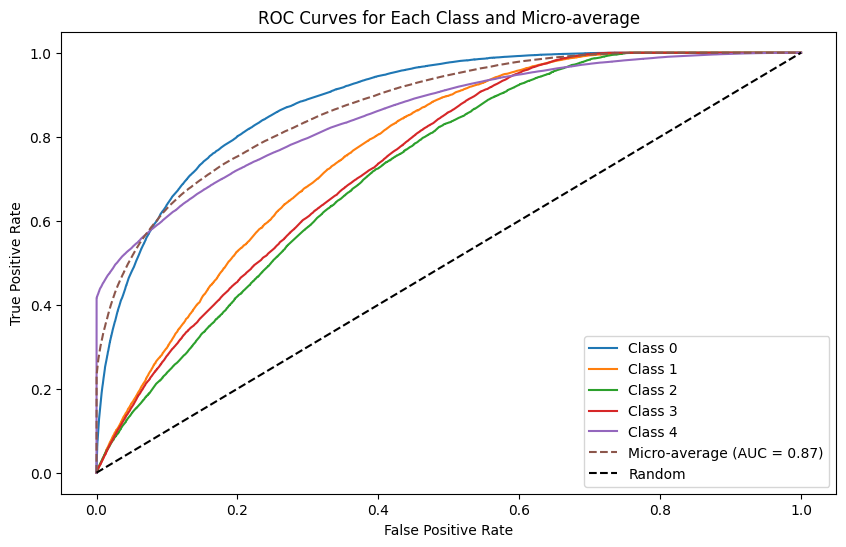

In [47]:
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc

class_probabilities = predictions[1]
true_labels_one_hot = label_binarize(target_test, classes=np.arange(class_probabilities.shape[1]))

fpr_dict = {}
tpr_dict = {}

# ROC curve
for i in range(class_probabilities.shape[1]):
    fpr_dict[i], tpr_dict[i], _ = roc_curve(true_labels_one_hot[:, i], class_probabilities[:, i])

# calculate AUC score
auc_score = roc_auc_score(true_labels_one_hot, class_probabilities, average='micro', multi_class='ovr')

# plot ROC curve
plt.figure(figsize=(10, 6))
for i in range(class_probabilities.shape[1]):
    plt.plot(fpr_dict[i], tpr_dict[i], label=f'Class {i}')

# plot ROC curve for average
fpr_micro, tpr_micro, _ = roc_curve(true_labels_one_hot.ravel(), class_probabilities.ravel())
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average (AUC = {auc_score:.2f})', linestyle='--')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class and Micro-average')
plt.legend()
plt.show()

### active

In [48]:
sample_non_active['stars_y']

0         4.5
2         4.0
3         4.0
5         4.0
8         4.0
         ... 
599966    3.5
599974    3.5
599975    3.5
599977    4.5
599980    4.5
Name: stars_y, Length: 138489, dtype: category
Categories (9, float64): [1.0, 1.5, 2.0, 2.5, ..., 3.5, 4.0, 4.5, 5.0]

In [49]:
bool_columns = sample_active.select_dtypes(include='bool').columns
sample_active[bool_columns] = sample_active[bool_columns].astype('float32')

category_columns = sample_active.select_dtypes(include='category').columns
label_encoders = {col: LabelEncoder() for col in category_columns}
sample_active[category_columns] = sample_active[category_columns].apply(lambda col: label_encoders[col.name].fit_transform(col))

# Split data into features and target
wide_features = sample_active[wide_cols].values
deep_features = sample_active[deep_cols].values
target = sample_active[target_col].values

# Split data into train and test sets
wide_train, wide_test, deep_train, deep_test, target_train, target_test = train_test_split(
    wide_features, deep_features, target, test_size=0.2, random_state=42
)

wide_features_shape = wide_train.shape
wide_input = Input(shape=wide_features_shape[1:], name='wide_input')
deep_features_shape = deep_train.shape
deep_input = Input(shape=deep_features_shape[1:], name='deep_input')

# Wide
wide_layer = Dense(5, activation='softmax', name='wide_output')(wide_input)

# Deep
num_classes=5
embedding_layer = Embedding(input_dim=2500, output_dim=200)(deep_input)
flatten_layer = Flatten()(embedding_layer)
deep_layer = Dense(128, activation='relu')(flatten_layer)
deep_layer = Dense(64, activation='relu')(deep_layer)
deep_layer = Dense(num_classes, activation='softmax', name='deep_output')(deep_layer)

combined_model = Model(inputs=[wide_input, deep_input], outputs=[wide_layer, deep_layer])

combined_model.compile(optimizer='adam',
                       loss={'wide_output': 'sparse_categorical_crossentropy', 'deep_output': 'sparse_categorical_crossentropy'},
                       metrics={'wide_output': 'accuracy', 'deep_output': 'accuracy'})

combined_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 38)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 38, 200)   │    500,000 │ deep_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 7600)      │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │    972,928 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 19)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      8,256 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_output (Dense) │ (None, 5)         │        100 │ wide_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_output (Dense) │ (None, 5)         │        325 │ dense_3[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,481,609 (5.65 MB)

 Trainable params: 1,481,609 (5.65 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
combined_model.fit([wide_train, deep_train], [target_train, target_train], epochs=4, batch_size=5)

Epoch 1/4
73841/73841 ━━━━━━━━━━━━━━━━━━━━ 716s 10ms/step - deep_output_accuracy: 0.5717 - loss: nan - wide_output_accuracy: 0.1242
Epoch 2/4
73841/73841 ━━━━━━━━━━━━━━━━━━━━ 708s 10ms/step - deep_output_accuracy: 0.5761 - loss: nan - wide_output_accuracy: 0.1224
Epoch 3/4
73841/73841 ━━━━━━━━━━━━━━━━━━━━ 700s 9ms/step - deep_output_accuracy: 0.5786 - loss: nan - wide_output_accuracy: 0.1231
Epoch 4/4
73841/73841 ━━━━━━━━━━━━━━━━━━━━ 736s 9ms/step - deep_output_accuracy: 0.5772 - loss: nan - wide_output_accuracy: 0.1227


In [51]:
predictions = combined_model.predict([wide_test, deep_test])
predicted_classes = np.argmax(predictions[1], axis=1)

conf_matrix = confusion_matrix(target_test, predicted_classes)

print("Confusion Matrix:")
print(conf_matrix)

correct_predictions = np.sum(predicted_classes == target_test)
total_samples = len(target_test)
accuracy = correct_predictions / total_samples

print(f'Accuracy: {accuracy * 100:.2f}%')

2885/2885 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
Confusion Matrix:
[[ 6271     0    99   127  4797]
 [ 2234     0    96   197  4049]
 [ 1434     0   130   499  6502]
 [ 1381     0   105   863 14654]
 [ 2372     0    79   668 45744]]
Accuracy: 57.43%


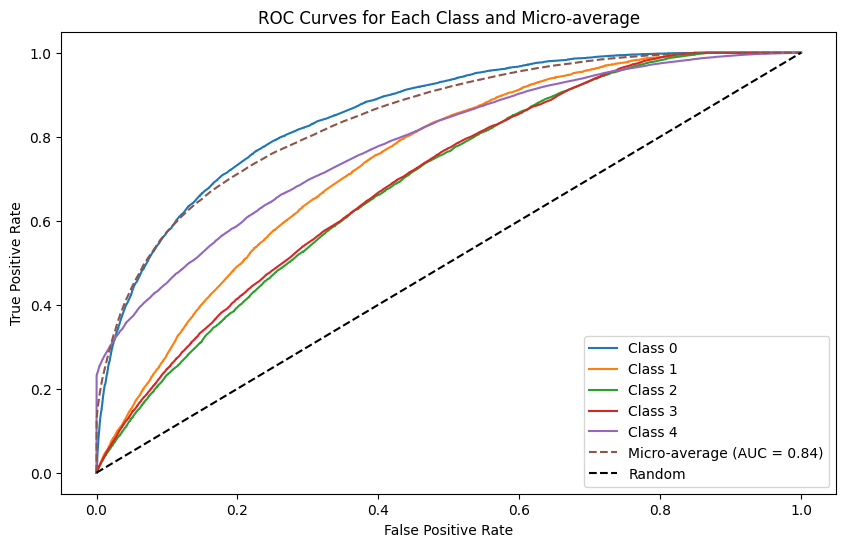

In [52]:
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc

class_probabilities = predictions[1]

true_labels_one_hot = label_binarize(target_test, classes=np.arange(class_probabilities.shape[1]))

fpr_dict = {}
tpr_dict = {}

for i in range(class_probabilities.shape[1]):
    fpr_dict[i], tpr_dict[i], _ = roc_curve(true_labels_one_hot[:, i], class_probabilities[:, i])

# 计算整体的微平均AUC值
auc_score = roc_auc_score(true_labels_one_hot, class_probabilities, average='micro', multi_class='ovr')

# 绘制每个类别的ROC曲线
plt.figure(figsize=(10, 6))
for i in range(class_probabilities.shape[1]):
    plt.plot(fpr_dict[i], tpr_dict[i], label=f'Class {i}')

# 绘制整体的微平均ROC曲线
fpr_micro, tpr_micro, _ = roc_curve(true_labels_one_hot.ravel(), class_probabilities.ravel())
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average (AUC = {auc_score:.2f})', linestyle='--')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class and Micro-average')
plt.legend()
plt.show()

### non-active

In [53]:
bool_columns = sample_non_active.select_dtypes(include='bool').columns
sample_non_active[bool_columns] = sample_non_active[bool_columns].astype('float32')

category_columns = sample_non_active.select_dtypes(include='category').columns
label_encoders = {col: LabelEncoder() for col in category_columns}
sample_non_active[category_columns] = sample_non_active[category_columns].apply(lambda col: label_encoders[col.name].fit_transform(col))

# Split data into features and target
wide_features = sample_non_active[wide_cols].values
deep_features = sample_non_active[deep_cols].values
target = sample_non_active[target_col].values

# Split data into train and test sets
wide_train, wide_test, deep_train, deep_test, target_train, target_test = train_test_split(
    wide_features, deep_features, target, test_size=0.2, random_state=42
)

wide_features_shape = wide_train.shape
wide_input = Input(shape=wide_features_shape[1:], name='wide_input')

deep_features_shape = deep_train.shape
deep_input = Input(shape=deep_features_shape[1:], name='deep_input')

# Wide
wide_layer = Dense(5, activation='softmax', name='wide_output')(wide_input)

# Deep
num_classes=5
embedding_layer = Embedding(input_dim=2500, output_dim=200)(deep_input)
flatten_layer = Flatten()(embedding_layer)
deep_layer = Dense(128, activation='relu')(flatten_layer)
deep_layer = Dense(64, activation='relu')(deep_layer)
deep_layer = Dense(num_classes, activation='softmax', name='deep_output')(deep_layer)

combined_model = Model(inputs=[wide_input, deep_input], outputs=[wide_layer, deep_layer])

combined_model.compile(optimizer='adam',
                       loss={'wide_output': 'sparse_categorical_crossentropy', 'deep_output': 'sparse_categorical_crossentropy'},
                       metrics={'wide_output': 'accuracy', 'deep_output': 'accuracy'})

combined_model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 38)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 38, 200)   │    500,000 │ deep_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 7600)      │          0 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │    972,928 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 19)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      8,256 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_output (Dense) │ (None, 5)         │        100 │ wide_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_output (Dense) │ (None, 5)         │        325 │ dense_5[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,481,609 (5.65 MB)

 Trainable params: 1,481,609 (5.65 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
combined_model.fit([wide_train, deep_train], [target_train, target_train], epochs=4, batch_size=5)

Epoch 1/4
22159/22159 ━━━━━━━━━━━━━━━━━━━━ 205s 9ms/step - deep_output_accuracy: 0.8038 - loss: nan - wide_output_accuracy: 0.2481
Epoch 2/4
22159/22159 ━━━━━━━━━━━━━━━━━━━━ 208s 9ms/step - deep_output_accuracy: 0.8108 - loss: nan - wide_output_accuracy: 0.2543
Epoch 3/4
22159/22159 ━━━━━━━━━━━━━━━━━━━━ 261s 9ms/step - deep_output_accuracy: 0.8110 - loss: nan - wide_output_accuracy: 0.2523
Epoch 4/4
22159/22159 ━━━━━━━━━━━━━━━━━━━━ 209s 9ms/step - deep_output_accuracy: 0.8130 - loss: nan - wide_output_accuracy: 0.2538


In [55]:
predictions = combined_model.predict([wide_test, deep_test])
predicted_classes = np.argmax(predictions[1], axis=1)

conf_matrix = confusion_matrix(target_test, predicted_classes)

print("Confusion Matrix:")
print(conf_matrix)

correct_predictions = np.sum(predicted_classes == target_test)
total_samples = len(target_test)
accuracy = correct_predictions / total_samples

print(f'Accuracy: {accuracy * 100:.2f}%')

866/866 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Confusion Matrix:
[[ 6662     0     0   396     0]
 [ 1950     0     0   247     0]
 [ 1168     0     0   300     0]
 [ 1169     0     0   603     0]
 [    0     0     0     0 15203]]
Accuracy: 81.12%


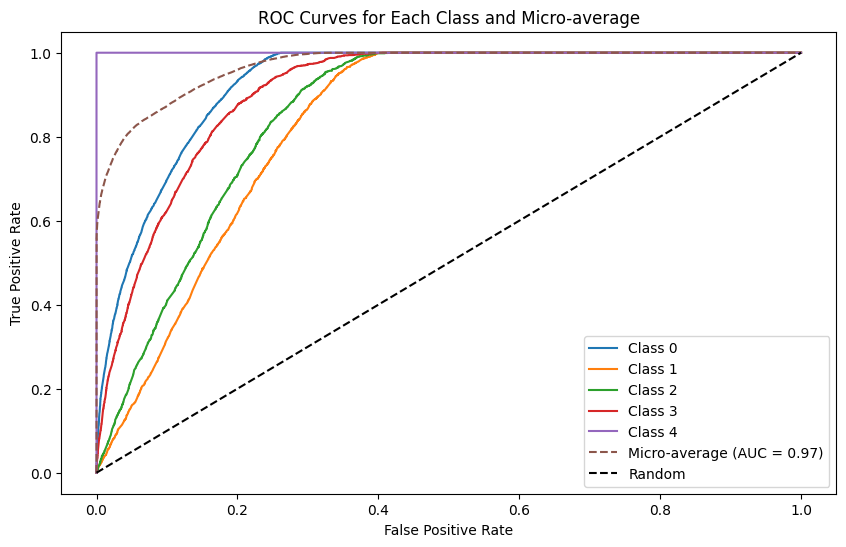

In [56]:
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc

class_probabilities = predictions[1]

true_labels_one_hot = label_binarize(target_test, classes=np.arange(class_probabilities.shape[1]))

fpr_dict = {}
tpr_dict = {}

for i in range(class_probabilities.shape[1]):
    fpr_dict[i], tpr_dict[i], _ = roc_curve(true_labels_one_hot[:, i], class_probabilities[:, i])

auc_score = roc_auc_score(true_labels_one_hot, class_probabilities, average='micro', multi_class='ovr')

plt.figure(figsize=(10, 6))
for i in range(class_probabilities.shape[1]):
    plt.plot(fpr_dict[i], tpr_dict[i], label=f'Class {i}')

fpr_micro, tpr_micro, _ = roc_curve(true_labels_one_hot.ravel(), class_probabilities.ravel())
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average (AUC = {auc_score:.2f})', linestyle='--')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class and Micro-average')
plt.legend()
plt.show()